In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
original_df= pd.read_csv('resale-flat-prices-cleaned.csv')

<AxesSubplot:>

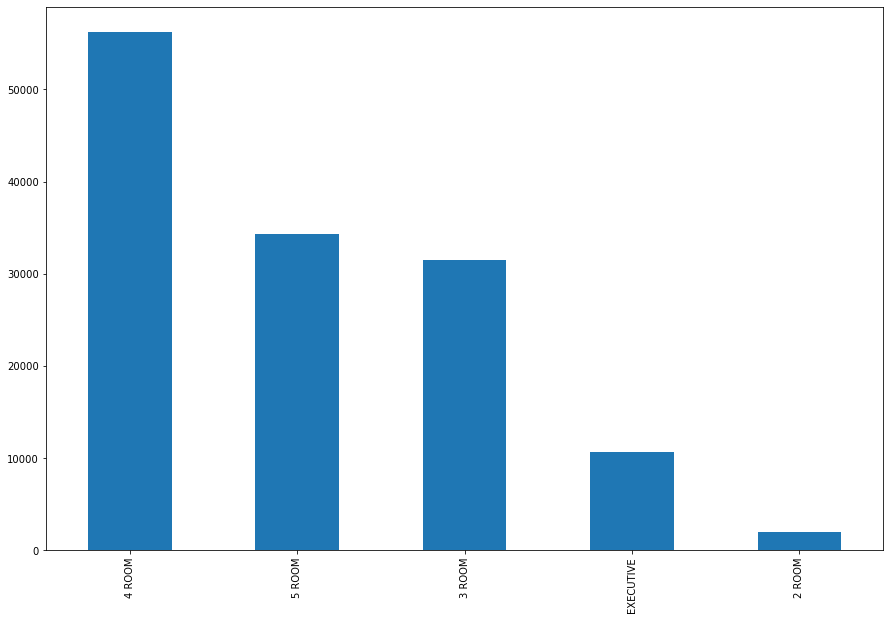

In [3]:
#Majority of the flats sold in Singapore is 4 ROOM.
original_df['flat_type'].value_counts()[:5].plot(kind='bar')

In [4]:
#To-Do:
#Convert flat_model data to one-hot encoding values or label encoded values.
#Convert storey to usable data.
#Convert flat_type to usable data.

In [5]:
#Check how many unique objects there are in the column.
original_df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [6]:
#Function to get the mean of the storey the flat is likely to be in.
#If storey_range is from 10-12, we'll take 11 as the floor of the flat.

def get_mean_floor(x):
    return int((int(x[:2]) + int(x[-2:]))*0.5)

In [7]:
#This column 'storey' will be used in our data analysis.

original_df['storey'] = original_df['storey_range'].map(lambda x: get_mean_floor(x)) 

#We shall only take the remaining years of the lease into account for our data analysis.

#original_df['remaining_lease'] = original_df['remaining_lease'].str.rsplit(' ', n=3).str.get(0)


In [8]:
room1_df = original_df[original_df['flat_type'] == "1 ROOM"]
room2_df = original_df[original_df['flat_type'] == "2 ROOM"]
room3_df = original_df[original_df['flat_type'] == "3 ROOM"]
room4_df = original_df[original_df['flat_type'] == "4 ROOM"]
room5_df = original_df[original_df['flat_type'] == "5 ROOM"]
multigen_df = original_df[original_df['flat_type'] == "MULTI-GENERATION"]
executive_df = original_df[original_df['flat_type'] == "EXECUTIVE"]


In [9]:
#Define town_premium variable to as the difference between median price for each town and overall median resale price
#town premium = difference between median price for each town vs overall median resale price
townprem1 = room1_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem1['town_premium'] = townprem1['resale_price']-townprem1['resale_price'].median()

townprem2 = room2_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem2['town_premium'] = townprem2['resale_price']-townprem2['resale_price'].median()

townprem3 = room3_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem3['town_premium'] = townprem3['resale_price']-townprem3['resale_price'].median()

townprem4 = room4_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem4['town_premium'] = townprem4['resale_price']-townprem4['resale_price'].median()

townprem5 = room4_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem5['town_premium'] = townprem5['resale_price']-townprem5['resale_price'].median()

townprem_multi = multigen_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem_multi['town_premium'] = townprem_multi['resale_price']-townprem_multi['resale_price'].median()

townprem_exec = executive_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
townprem_exec['town_premium'] = townprem_exec['resale_price']-townprem_exec['resale_price'].median()


In [10]:
#flat model premium = difference between median price for each model vs overall median resale price
flatprem1= room1_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem1['flat_model_premium'] = flatprem1['resale_price']-flatprem1['resale_price'].median()

flatprem2= room2_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem2['flat_model_premium'] = flatprem2['resale_price']-flatprem2['resale_price'].median()

flatprem3= room3_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem3['flat_model_premium'] = flatprem3['resale_price']-flatprem3['resale_price'].median()

flatprem4= room4_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem4['flat_model_premium'] = flatprem4['resale_price']-flatprem4['resale_price'].median()

flatprem5= room5_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem5['flat_model_premium'] = flatprem5['resale_price']-flatprem5['resale_price'].median()

flatprem_multi= multigen_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem_multi['flat_model_premium'] = flatprem_multi['resale_price']-flatprem_multi['resale_price'].median()

flatprem_exec= executive_df.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
flatprem_exec['flat_model_premium'] = flatprem_exec['resale_price']-flatprem_exec['resale_price'].median()

In [11]:
def premiums(dataframe):
    townprem = dataframe.groupby(['town'],as_index=False).median()[['town','resale_price']]
    townprem['town_premium'] = townprem['resale_price']-townprem['resale_price'].median()
    
    flatprem= dataframe.groupby(['flat_model'],as_index = False).median()[['flat_model','resale_price']]
    flatprem['flat_model_premium'] = flatprem['resale_price']-flatprem['resale_price'].median()

In [12]:
x1_df = pd.merge(room1_df, townprem1[['town','town_premium']],on='town')
x2_df = pd.merge(room2_df, townprem2[['town','town_premium']],on='town')
x3_df = pd.merge(room3_df, townprem3[['town','town_premium']],on='town')
x4_df = pd.merge(room4_df, townprem4[['town','town_premium']],on='town')
x5_df = pd.merge(room5_df, townprem5[['town','town_premium']],on='town')
xmulti_df = pd.merge(multigen_df, townprem_multi[['town','town_premium']],on='town')
xexec_df = pd.merge(executive_df, townprem_exec[['town','town_premium']],on='town')



In [13]:
room1_df = pd.merge(x1_df, flatprem1[['flat_model','flat_model_premium']],on='flat_model')
room2_df = pd.merge(x2_df, flatprem2[['flat_model','flat_model_premium']],on='flat_model')
room3_df = pd.merge(x3_df, flatprem3[['flat_model','flat_model_premium']],on='flat_model')
room4_df = pd.merge(x4_df, flatprem4[['flat_model','flat_model_premium']],on='flat_model')
room5_df = pd.merge(x5_df, flatprem5[['flat_model','flat_model_premium']],on='flat_model')
multigen_df = pd.merge(xmulti_df, flatprem_multi[['flat_model','flat_model_premium']],on='flat_model')
executive_df = pd.merge(xexec_df, flatprem_exec[['flat_model','flat_model_premium']],on='flat_model')




,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,combined_blk_street_name,oneMapAPI_Name,time_to_city,nearest_mall,nearest_school,nearest_mrt,storey,town_premium,flat_model_premium
0,2017-03,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,57,200000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,2,0.0,0.0
1,2017-03,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,57,218000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,2,0.0,0.0
2,2017-05,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,07 TO 09,31.0,Improved,1975,56,217000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,8,0.0,0.0
3,2017-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,175000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,5,0.0,0.0
4,2017-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,56,203000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,11,0.0,0.0
5,2017-08,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,190000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,5,0.0,0.0
6,2017-09,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,56,190000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,2,0.0,0.0
7,2017-09,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,205000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,5,0.0,0.0
8,2017-11,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,210000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,5,0.0,0.0
9,2018-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,56,232000.0,7 TELOK BLANGAH CRES,7 TELOK BLANGAH CRESCENT SINGAPORE 090007,22.583333,1876,1040,1862,11,0.0,0.0


In [18]:
room1_df.to_csv("1-room-flat-data.csv")
room2_df.to_csv("2-room-flat-data.csv")
room3_df.to_csv("3-room-flat-data.csv")
room4_df.to_csv("4-room-flat-data.csv")
room5_df.to_csv("5-room-flat-data.csv")
multigen_df.to_csv("multi-generation-flat-data.csv")
executive_df.to_csv("executive-flat-data.csv")

In [ ]:
#room4model = pickle.load(open("4_room_prediction_model", 'rb'))
#room4model.predict([[95,87,41,113500,228000]])